In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\sonal\\Desktop\\Sonali\\Students.csv")
df.head()

,Background,Machine Learning,Python,Remark
0,Tech,78.0,98.0,Pass
1,Tech,NaN,10.0,Fail
2,Non-Tech,69.0,NaN,Pass
3,Non-Tech,76.0,56.0,Pass
4,Tech,NaN,NaN,Pass


In [3]:
df.tail()

,Background,Machine Learning,Python,Remark
5,Tech,20.0,40.0,Fail
6,Tech,NaN,10.0,Fail
7,Non-Tech,54.0,20.0,Pass
8,Tech,87.0,98.0,Pass
9,Non-Tech,NaN,NaN,Fail


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Background        10 non-null     object 
 1   Machine Learning  6 non-null      float64
 2   Python            7 non-null      float64
 3   Remark            10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [5]:
df.isna().sum()

Background          0
Machine Learning    4
Python              3
Remark              0
dtype: int64

In [6]:
df.describe()

,Machine Learning,Python
count,6.000000,7.000000
mean,64.000000,47.428571
std,24.207437,38.292110
min,20.000000,10.000000
25%,57.750000,15.000000
50%,72.500000,40.000000
75%,77.500000,77.000000
max,87.000000,98.000000


<AxesSubplot:>

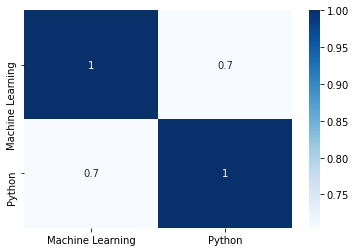

In [7]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

<AxesSubplot:xlabel='Background', ylabel='count'>

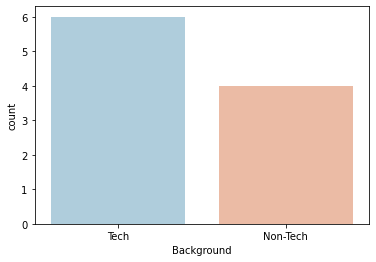

In [8]:
sns.countplot(x="Background",data=df,palette="RdBu_r")

<AxesSubplot:xlabel='Machine Learning', ylabel='count'>

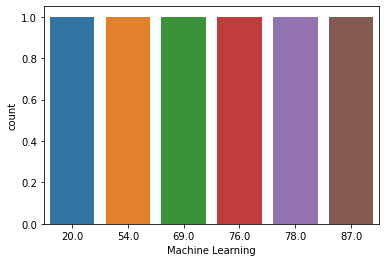

In [9]:
sns.countplot(x="Machine Learning",data=df)

<AxesSubplot:xlabel='Python', ylabel='count'>

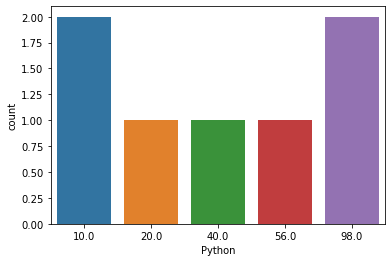

In [10]:
sns.countplot(x="Python",data=df)

# Seperate X and Y

In [11]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [12]:
x

array([['Tech', 78.0, 98.0],
       ['Tech', nan, 10.0],
       ['Non-Tech', 69.0, nan],
       ['Non-Tech', 76.0, 56.0],
       ['Tech', nan, nan],
       ['Tech', 20.0, 40.0],
       ['Tech', nan, 10.0],
       ['Non-Tech', 54.0, 20.0],
       ['Tech', 87.0, 98.0],
       ['Non-Tech', nan, nan]], dtype=object)

In [13]:
y

array(['Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail', 'Pass',
       'Pass', 'Fail'], dtype=object)

# Handle all the missing data with imputer

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
si=SimpleImputer(missing_values=np.nan,strategy="mean")
si.fit(x[:,1:])    

x[:,1:]=si.transform(x[:,1:])     

In [16]:
x

array([['Tech', 78.0, 98.0],
       ['Tech', 64.0, 10.0],
       ['Non-Tech', 69.0, 47.42857142857143],
       ['Non-Tech', 76.0, 56.0],
       ['Tech', 64.0, 47.42857142857143],
       ['Tech', 20.0, 40.0],
       ['Tech', 64.0, 10.0],
       ['Non-Tech', 54.0, 20.0],
       ['Tech', 87.0, 98.0],
       ['Non-Tech', 64.0, 47.42857142857143]], dtype=object)

# OneHotEncoder to Features 

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [18]:
ct=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[0])],remainder="passthrough")
x=np.array(ct.fit_transform(x))

In [19]:
x

array([[0.0, 1.0, 78.0, 98.0],
       [0.0, 1.0, 64.0, 10.0],
       [1.0, 0.0, 69.0, 47.42857142857143],
       [1.0, 0.0, 76.0, 56.0],
       [0.0, 1.0, 64.0, 47.42857142857143],
       [0.0, 1.0, 20.0, 40.0],
       [0.0, 1.0, 64.0, 10.0],
       [1.0, 0.0, 54.0, 20.0],
       [0.0, 1.0, 87.0, 98.0],
       [1.0, 0.0, 64.0, 47.42857142857143]], dtype=object)

# LabelEncoder to Target

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [21]:
y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

# Split the training and testing set

In [22]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

# Feature Scaling with StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain[:,2:]=sc.fit_transform(xtrain[:,2:])
xtest[:,2:]=sc.fit_transform(xtest[:,2:])

In [24]:
xtrain

array([[0.0, 1.0, 0.032816001308019586, -1.1286604785076384],
       [0.0, 1.0, 0.032816001308019586, 0.0],
       [0.0, 1.0, 0.7678944306076584, 1.524984005311847],
       [1.0, 0.0, 0.6628832264219957, 0.2584718653070927],
       [0.0, 1.0, 0.032816001308019586, -1.1286604785076384],
       [1.0, 0.0, -0.4922400196202938, -0.8271099689826968],
       [0.0, 1.0, 1.2404448494431404, 1.524984005311847],
       [0.0, 1.0, -2.2774304907765592, -0.22400894993281378]],
      dtype=object)

In [25]:
xtest

array([[1.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, -1.0, 0.0]], dtype=object)